In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Root directory to Top Country CSV folder
rootdir = Path('Top Country CSV')

# Loops through each csv file in Top Country CSV folder
file_list = [f for f in rootdir.glob("*.csv") if f.is_file()]

In [3]:
# Store country name
country_name = str(file_list[0]).split("\\")[-1].split("_")[0]

# Convert first csv into DataFrame
country_df = pd.read_csv(file_list[0])

# Drops unecessary column
country_df = country_df.drop(columns = 'Unnamed: 0')

# Insert country name column
country_df.insert(0, "Country", country_name)
country_df.head()

,Country,Artists Name,Artist ID,Track Name,Track ID,Release Date,Popularity,Danceability,Energy
0,Argentina,Daddy Yankee,4VMYDCV2IEDYJArk749S6m,Con Calma,5w9c2J52mkdntKOmRLeM2m,2019-01-24,95,0.737,0.860
1,Argentina,Pedro Capó,4QVBYiagIaa6ZGSPMbybpy,Calma - Remix,5iwz1NiezX7WWjnCgY5TH4,2018-10-05,96,0.826,0.773
2,Argentina,Anuel Aa,2R21vXR83lH98kGeO99Y66,Secreto,5W83ErFkO3aKAIS1WMi6u0,2019-01-15,95,0.807,0.803
3,Argentina,Paulo Londra,3vQ0GE3mI0dAaxIMYe5g7z,Adan y Eva,6FyRXC8tJUh863JCkyWqtk,2018-11-05,94,0.767,0.709
4,Argentina,Mau y Ricky,2wkoKEfS6dXwThbyTnZWFU,Desconocidos,0s5DNDV6LAKn2u2Ufa3VjQ,2018-10-12,92,0.709,0.771


In [4]:
# Loop starts at second file and ends at last
for file in file_list[1:]:
    country_name = str(file).split("\\")[-1].split("_")[0]
    
    df = pd.read_csv(file)
    
    df = df.drop(columns = 'Unnamed: 0')
    df.insert(0, "Country", country_name)
    
    # Add each country DataFrame onto the first
    country_df = country_df.append(df)

In [5]:
# Grab only country column and danceability column
country_df = country_df[["Country", "Danceability"]]

In [6]:
country_danceability_mean = country_df.groupby("Country").mean()
country_danceability_mean

,Danceability
Country,
Argentina,0.75074
Brazil,0.70690
Canada,0.72654
Columbia,0.74358
France,0.74024
Germany,0.74600
Indonesia,0.63420
Japan,0.57404
Phillipines,0.62096


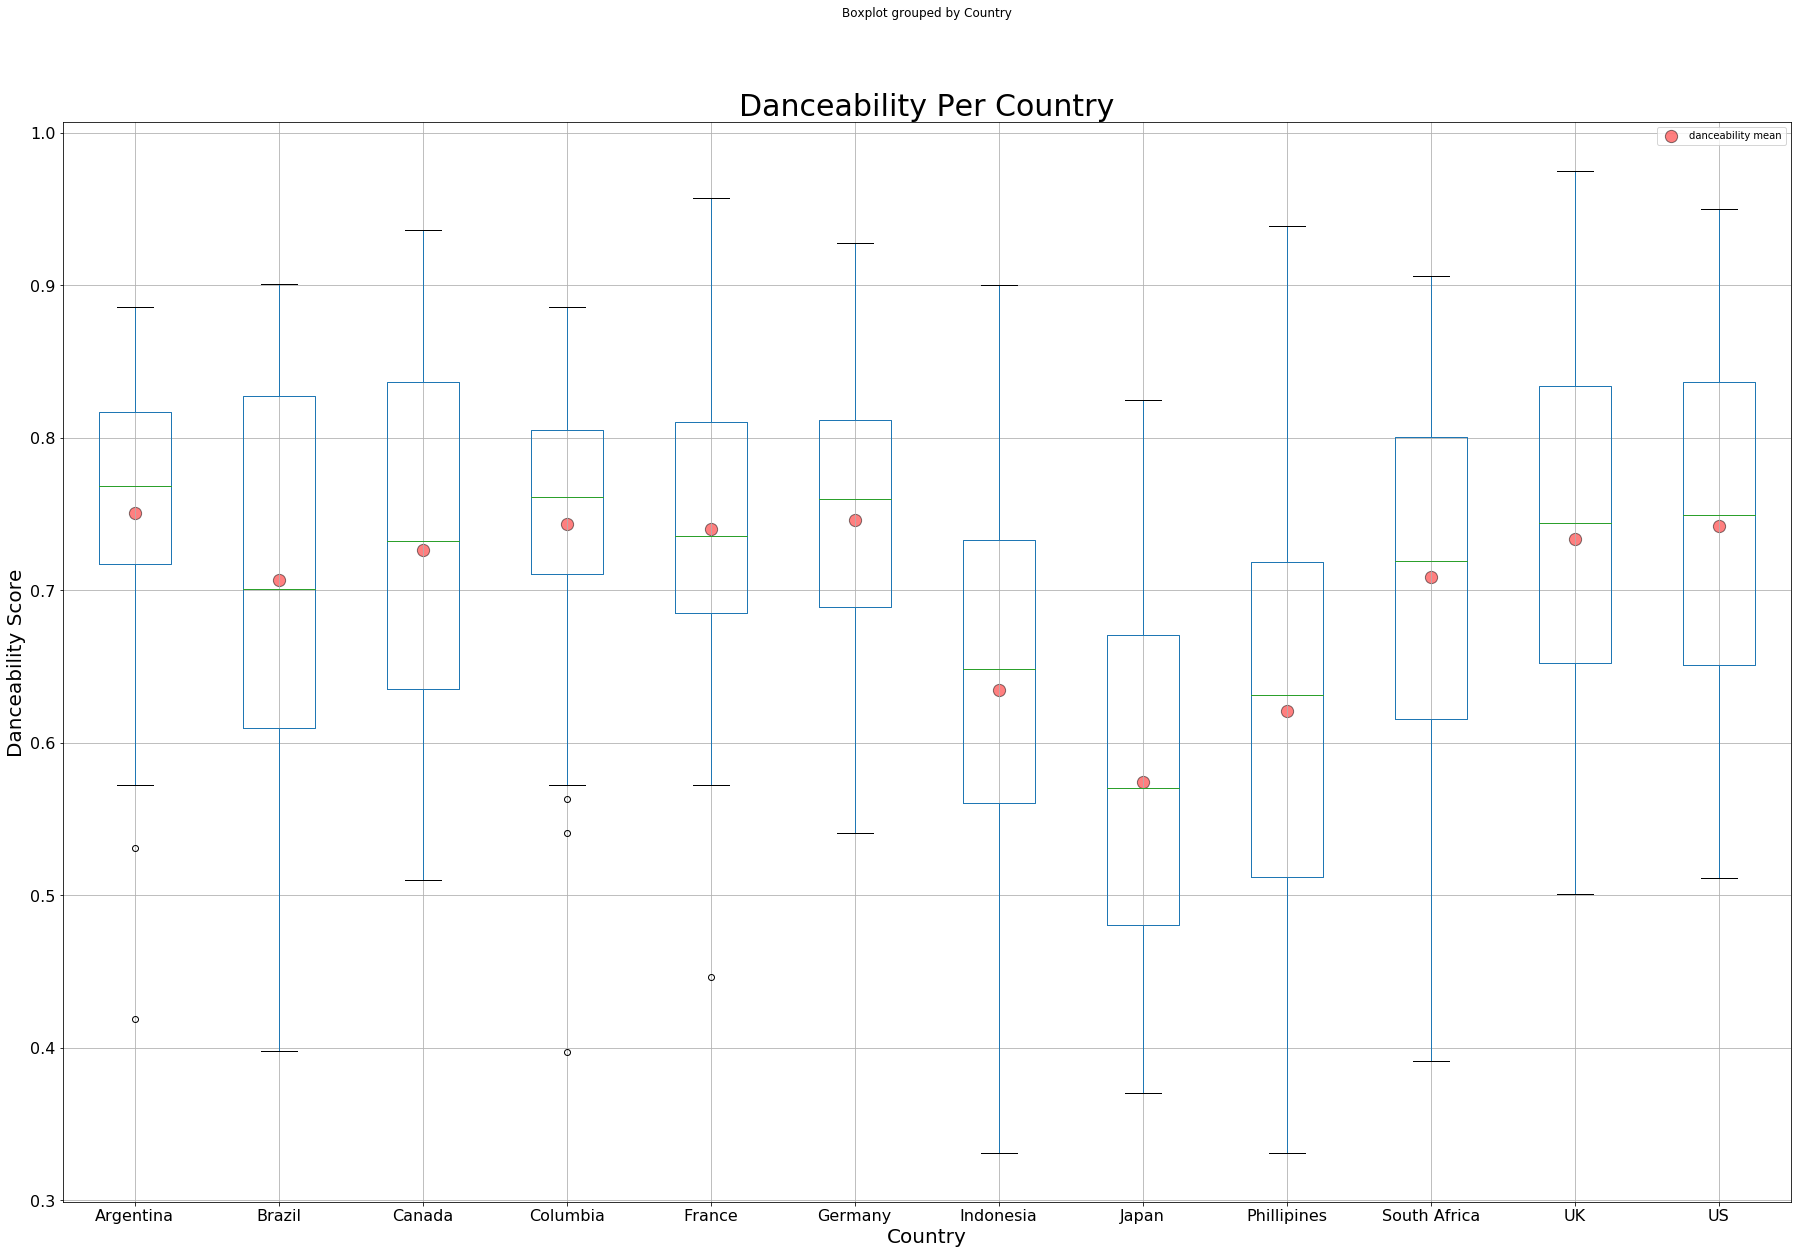

In [7]:
# Create boxplot grouped by country
country_df.boxplot("Danceability", by = "Country", figsize = (30,20))

ax = plt.gca()

x_axis = np.arange(ax.get_xlim()[0] + ax.get_xlim()[0], ax.get_xlim()[1], 1)

plt.scatter(x_axis, country_danceability_mean["Danceability"], color = 'r', alpha = 0.5, edgecolor = 'k', s = 150, label = "danceability mean")
plt.xlabel("Country", Fontsize = 20)
plt.xticks(Fontsize = 16)
plt.ylabel("Danceability Score", Fontsize = 20)
plt.yticks(Fontsize = 16)
plt.title("Danceability Per Country", Fontsize = 30)

plt.legend()

plt.savefig("Images/Danceability__Per_Country_Boxplot.png")

plt.show()